In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sales_data_sample.csv',sep=',',encoding='Latin-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
df.drop(['ADDRESSLINE2','STATE','TERRITORY','POSTALCODE'],axis=1,inplace=True)
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium


c:\users\91721\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


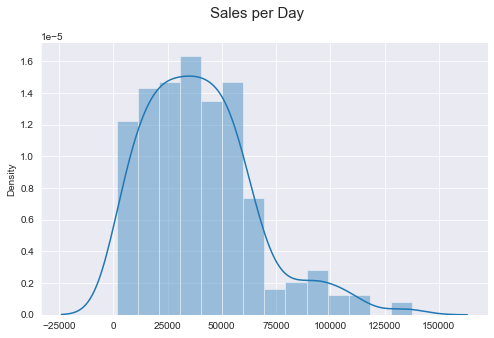

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
plt.suptitle('Sales per Day',fontsize=15)
x=sns.distplot(df.groupby('ORDERDATE').sum()['SALES'])
x.set(xlabel=None)
sns.despine()

<BarContainer object of 5 artists>

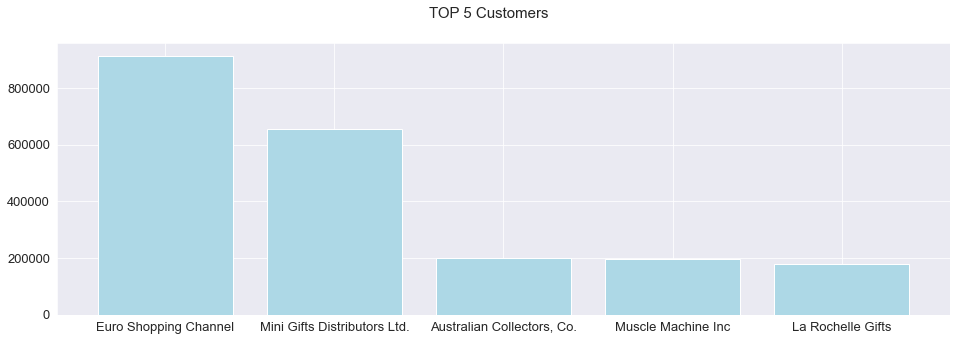

In [8]:
customers=df.groupby('CUSTOMERNAME').sum()['SALES'].nlargest(5)
plt.figure(figsize=(16,5))
plt.suptitle('TOP 5 Customers', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.bar(customers.index,customers, color='lightblue')

<BarContainer object of 5 artists>

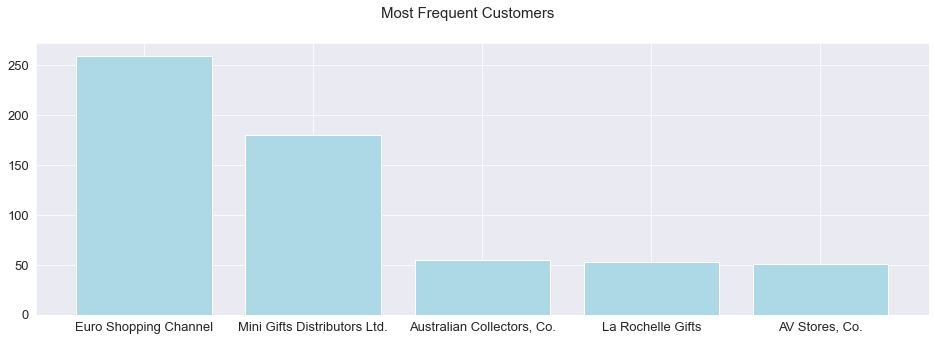

In [9]:
count=customers=df.groupby('CUSTOMERNAME').count()['ORDERDATE'].nlargest(5)
plt.figure(figsize=(16,5))
plt.suptitle('Most Frequent Customers',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.bar(count.index,count,color='lightblue')

c:\users\91721\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


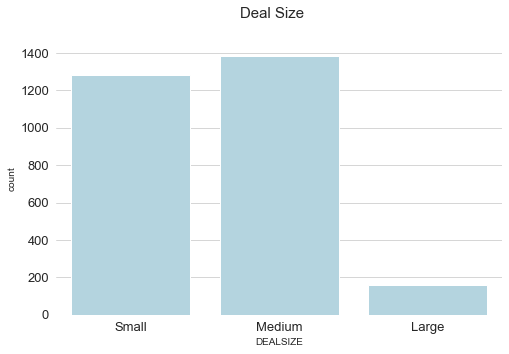

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
plt.suptitle('Deal Size',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.countplot(df['DEALSIZE'],color='lightblue')
sns.despine(left=True,bottom=True)

c:\users\91721\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


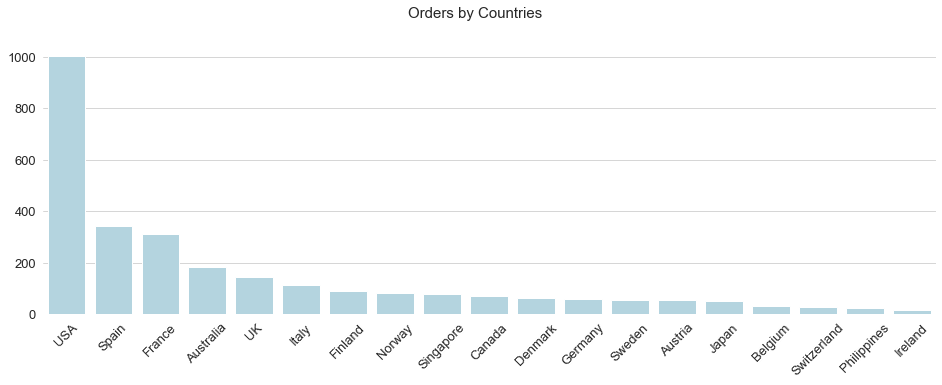

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.suptitle('Orders by Countries',fontsize=15)
plt.xticks(fontsize=13, rotation=45)
plt.yticks(fontsize=13)
ax=sns.countplot(df['COUNTRY'],color='lightblue',order = df['COUNTRY'].value_counts().index)
ax.set(xlabel=None, ylabel=None)
sns.despine(left=True,bottom=True)

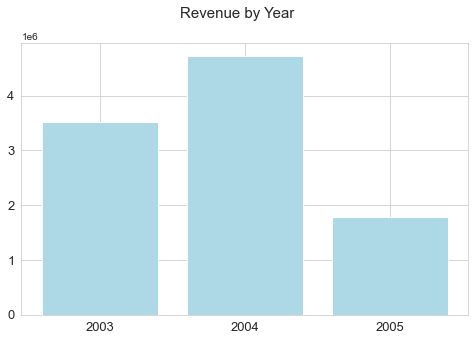

In [12]:
years = df.groupby('YEAR_ID').sum()['SALES']
plt.figure(figsize=(8,5))
plt.bar(years.index.astype(str),years,color='lightblue')
plt.suptitle('Revenue by Year', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

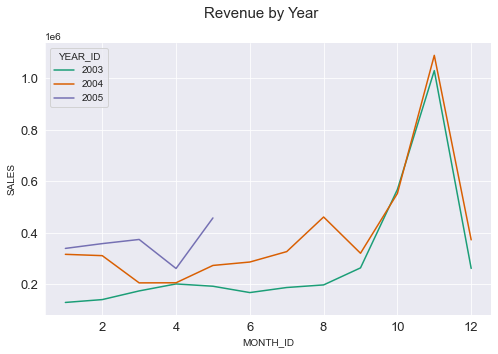

In [13]:
sns.set_style('darkgrid')
monthly_rev = df.groupby(['YEAR_ID','MONTH_ID']).sum()
plt.figure(figsize=(8,5))
sns.lineplot(x='MONTH_ID',y='SALES',hue='YEAR_ID',data=monthly_rev,palette='Dark2')
plt.suptitle('Revenue by Year', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine();

In [14]:
monthly_rev.reset_index
monthly_rev['monthly_growth']=monthly_rev['SALES'].pct_change()
monthly_rev.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
YEAR_ID MONTH_ID                                                             
2003    1              394008             1357    3203.31              250   
        2              414339             1449    3441.55              327   
        3              505484             1755    4086.67              327   
        4              586819             1993    4925.11              375   
        5              587175             2017    4753.17              425   

                      SALES  QTR_ID  MSRP  monthly_growth  
YEAR_ID MONTH_ID                                           
2003    1         129753.60      39  3950             NaN  
        2         140836.19      41  4038        0.085413  
        3         174504.90      50  5003        0.239063  
        4         201609.55     116  5810        0.155323  
        5         192673.11     116  5900       -0.044325

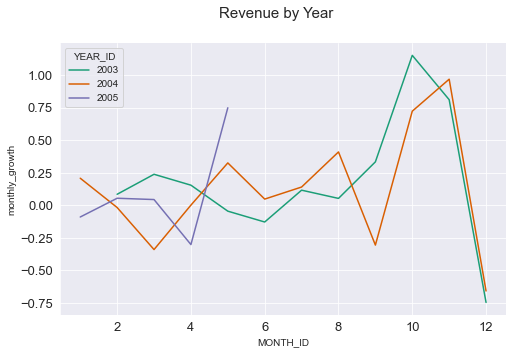

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(x='MONTH_ID',y='monthly_growth',hue='YEAR_ID',data=monthly_rev,palette='Dark2')
plt.suptitle('Revenue by Year', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.despine();

## RFM 

In [16]:
import datetime as dt

In [17]:
latest_date = df['ORDERDATE'].max() + dt.timedelta(1)

In [18]:
RFM = df.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (latest_date-x.max()).days,
                                            'ORDERNUMBER':'count', 'SALES':'sum'})
RFM.columns = ['RECENCY','FREQUENCY','MONETARY']

In [19]:
RFM["RECENCY_Quartile"]=pd.qcut(RFM['RECENCY'],q=5,labels=range(5,0,-1))
RFM['FREQUENCY_Quartile']=pd.qcut(RFM['FREQUENCY'],q=5,labels=range(1,6))
RFM['MONETARY_Quartile']=pd.qcut(RFM['MONETARY'],q=5,labels=range(1,6))

In [20]:
RFM[['RECENCY','FREQUENCY','MONETARY']]=RFM[['RECENCY','FREQUENCY','MONETARY']].astype(int)

In [21]:
RFM['RFM_Score'] = RFM[['RECENCY_Quartile','FREQUENCY_Quartile','MONETARY_Quartile']].sum(axis=1)

In [22]:
RFM.head()

,RECENCY,FREQUENCY,MONETARY,RECENCY_Quartile,FREQUENCY_Quartile,MONETARY_Quartile,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807,3,5,5,13
Alpha Cognac,65,20,70488,4,2,2,8
Amica Models & Co.,265,26,94117,1,3,3,7
"Anna's Decorations, Ltd",84,46,153996,4,5,5,14
Atelier graphique,188,7,24179,3,1,1,5


## K-Means

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Cluster_df = scaler.fit_transform(RFM[['RECENCY','FREQUENCY','MONETARY']])
Cluster_df=pd.DataFrame(Cluster_df)
Cluster_df.head()

,0,1,2
0,0.100792,0.660316,0.444429
1,-0.901470,-0.347293,-0.351497
2,0.628701,-0.152272,-0.136115
3,-0.756104,0.497798,0.409691
4,0.039585,-0.769838,-0.773610


In [24]:
wcss = []
for i in range(1,12):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=2)
    kmeans.fit(Cluster_df)
    wcss.append(kmeans.inertia_)

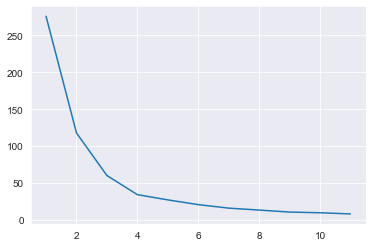

In [25]:
plt.plot(range(1,12),wcss)

In [26]:
kmeans=KMeans(4,init='k-means++',random_state=1)
RFM['Cluster']=kmeans.fit_predict(Cluster_df)


In [27]:
RFM

,RECENCY,FREQUENCY,MONETARY,RECENCY_Quartile,FREQUENCY_Quartile,MONETARY_Quartile,RFM_Score,Cluster
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807,3,5,5,13,3
Alpha Cognac,65,20,70488,4,2,2,8,0
Amica Models & Co.,265,26,94117,1,3,3,7,3
"Anna's Decorations, Ltd",84,46,153996,4,5,5,14,0
Atelier graphique,188,7,24179,3,1,1,5,3
...,...,...,...,...,...,...,...,...
"Vida Sport, Ltd",275,31,117713,1,4,4,9,3
Vitachrome Inc.,208,25,88041,2,3,3,8,3
"Volvo Model Replicas, Co",194,19,75754,3,2,2,7,3


In [32]:
cluster = RFM.groupby('Cluster').agg({'RECENCY':'mean',
                           'FREQUENCY':'mean',
                           'MONETARY':'mean',
                           'RFM_Score':'mean',
                            'MONETARY_Quartile':'count'})
cluster.rename(columns={'MONETARY_Quartile':'Count'},inplace=True)

In [33]:
cluster

,RECENCY,FREQUENCY,MONETARY,RFM_Score,Count
Cluster,,,,,
0,51.965517,31.793103,114589.241379,11.965517,29
1,449.166667,18.250000,65293.750000,4.583333,12
2,2.000000,219.500000,783576.000000,15.000000,2
3,202.428571,25.367347,88955.469388,7.979592,49


In [34]:
def Cust_val(x):
    if x==0: return 'High_value' 
    elif x==1: return 'Low_value' 
    elif x==2: return 'VIP' 
    else: return 'Mid_value'

In [35]:
RFM['Customer_level']=RFM['Cluster'].apply(Cust_val)

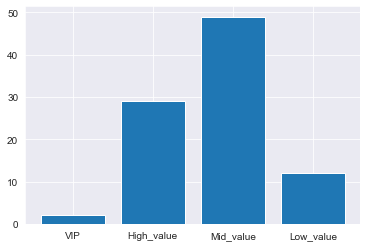

In [49]:
x=RFM.groupby('Customer_level').count()['Cluster']
plt.bar(x.loc[['VIP','High_value','Mid_value','Low_value']].index,x.loc[['VIP','High_value','Mid_value','Low_value']]);

In [51]:
RFM.to_csv('Customer_segmented.csv')